In [1]:
import os
import numpy as np
from keras.models import Model
from keras.layers import Dense, Input
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
#input data

np.random.seed(2)
X = np.random.random((150, 2)) * 4.0 - 2.0

Y = [
    1 if x**4 - y**2 < x**2*y
        else 0 for [x, y] in X
]

In [3]:
l0 = Input(shape=(2,))
l1 = Dense(6, activation='sigmoid', use_bias=True)(l0)
l2 = Dense(1, activation='sigmoid', use_bias=False)(l1)

model = Model(input=l0, output=l2)

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['accuracy']
)

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\Петя\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """


In [4]:
if os.path.isfile("smart_duckling.h5"):
    model.load_weights("smart_duckling.h5")
else:
    model.fit(
        X, Y,
        epochs=20000,
        verbose=False
    )
    model.save("smart_duckling.h5")

Instructions for updating:
Use tf.cast instead.


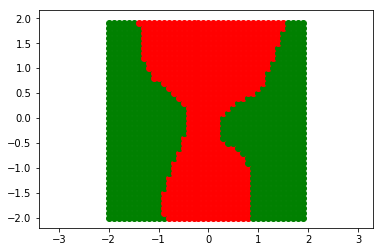

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.axis('equal')

c = np.r_[-2:2:0.1]


XY = np.transpose([np.tile(c, len(c)), np.repeat(c, len(c))])

Z = model.predict(XY)

for (x, y), z in zip(XY, Z):
    plt.scatter(x, y, c='red' if z[0] >= 0.7 else 'green')

plt.show()

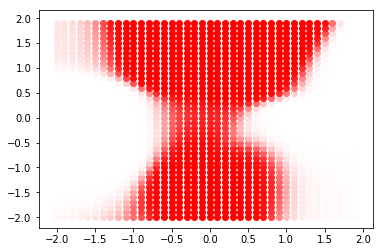

In [6]:
def saturate(v):
    return min(1, max(0, v))

for (x, y), z in zip(XY, Z):
    plt.scatter(x, y, color=[(1, 1-saturate(z[0]), 1-saturate(z[0]))])

plt.show()

вот график этой штуки:
    https://www.desmos.com/calculator/mazyguleha